In [52]:
import warnings
warnings.filterwarnings("ignore")

from importlib import reload
import pandas as pd
from src import granite
from src import arima
from src import rnn
from src import lstm
from src import transformer
from src import plot_predictions
from src import check_input
from src import evaluate_results

ファイル 'dataset/input.csv' は正常です。行数: 1824, カラム名: target


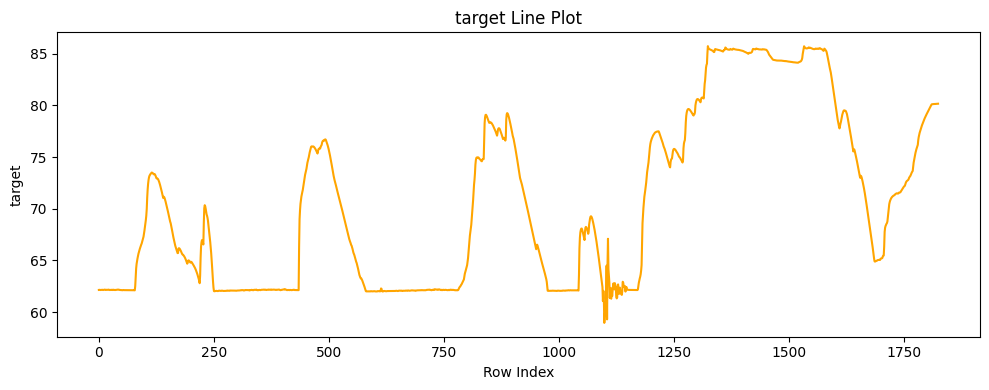

In [6]:
reload(check_input)
# data = pd.read_csv("input.csv")

data=check_input.load_and_check_csv("dataset/input.csv")

# どの時点から予測をするか設定してください。

In [42]:
TEST_START = 1250

# Granite

In [43]:

reload(granite)
granite.rolling_forecast_ttm(data=data,T=TEST_START).to_csv("result/granite.csv", index=False)


INFO:p-5158:t-139918022205440:get_model.py:get_model:Loading model from: ibm-granite/granite-timeseries-ttm-r2
INFO:p-5158:t-139918022205440:get_model.py:get_model:Model loaded successfully from ibm-granite/granite-timeseries-ttm-r2, revision = 1024-96-r2.
INFO:p-5158:t-139918022205440:get_model.py:get_model:[TTM] context_length = 1024, prediction_length = 96



=== Rolling 1/6 ===



=== Rolling 2/6 ===



=== Rolling 3/6 ===



=== Rolling 4/6 ===



=== Rolling 5/6 ===



=== Rolling 6/6 ===


# ARIMA

In [44]:
reload(arima)
arima.forecast_arima(
    data=data,                  # 予測対象の時系列データ
    T=TEST_START,               # 学習と予測を分ける行番号
    arima_order=(2, 1, 2)      # ARIMAモデルの(p,d,q)パラメータ: 自己回帰次数, 差分次数, 移動平均次数
).to_csv("result/arima.csv", index=False)


# RNN

In [66]:
reload(rnn)
rnn.rolling_forecast_rnn(
    data=data,                     # 予測対象の時系列データ
    T=TEST_START,                  # 学習と予測を分ける行番号
    context_length=100,            # 1回の入力として使用する過去の時刻ステップ数
    rolling_step=10,                # 1ステップごとに予測する時刻ステップ数
    epochs=300                     # 学習データ全体に対する繰り返し回数
).to_csv("result/rnn.csv", index=False)


Epoch 1/300 | Loss 4399.8874
Epoch 2/300 | Loss 4054.1703
Epoch 3/300 | Loss 3603.6392
Epoch 4/300 | Loss 3259.1112
Epoch 5/300 | Loss 2958.1234
Epoch 6/300 | Loss 2697.9552
Epoch 7/300 | Loss 2462.0872
Epoch 8/300 | Loss 2249.4932
Epoch 9/300 | Loss 2042.6886
Epoch 10/300 | Loss 1851.5976
Epoch 11/300 | Loss 1678.7623
Epoch 12/300 | Loss 1522.7979
Epoch 13/300 | Loss 1378.7138
Epoch 14/300 | Loss 1247.4996
Epoch 15/300 | Loss 1124.4136
Epoch 16/300 | Loss 1013.3765
Epoch 17/300 | Loss 911.6297
Epoch 18/300 | Loss 817.7340
Epoch 19/300 | Loss 732.9437
Epoch 20/300 | Loss 656.0368
Epoch 21/300 | Loss 585.4517
Epoch 22/300 | Loss 522.2945
Epoch 23/300 | Loss 463.3616
Epoch 24/300 | Loss 412.3129
Epoch 25/300 | Loss 365.0577
Epoch 26/300 | Loss 324.8015
Epoch 27/300 | Loss 286.3423
Epoch 28/300 | Loss 252.1670
Epoch 29/300 | Loss 223.5245
Epoch 30/300 | Loss 197.0607
Epoch 31/300 | Loss 174.1959
Epoch 32/300 | Loss 153.6603
Epoch 33/300 | Loss 135.7597
Epoch 34/300 | Loss 120.0446
Epoch 3

# LSTM

In [69]:
reload(lstm)
lstm.rolling_forecast_lstm(
    data=data,                     # 予測対象の時系列データ
    T=TEST_START,                  # 学習と予測を分ける行番号
    context_length=300,            # 1回の入力として使用する過去の時刻ステップ数
    rolling_step=10,                # 1ステップごとに予測する時刻ステップ数
    hidden_size=128,               # LSTMの隠れ層の次元数（表現力を決定）
    num_layers=2,                  # LSTM層の深さ（多いほど長期依存を学習可能）
    dropout=0.2,                   # 過学習防止のためのドロップアウト率
    epochs=300                     # 学習データ全体に対する繰り返し回数
).to_csv("result/lstm.csv", index=False)


Epoch 1/300 | Loss 4212.5552
Epoch 2/300 | Loss 3598.6492
Epoch 3/300 | Loss 3102.9105
Epoch 4/300 | Loss 2681.1907
Epoch 5/300 | Loss 2313.3138
Epoch 6/300 | Loss 1985.0569
Epoch 7/300 | Loss 1698.2773
Epoch 8/300 | Loss 1447.6956
Epoch 9/300 | Loss 1233.2103
Epoch 10/300 | Loss 1040.2007
Epoch 11/300 | Loss 875.6618
Epoch 12/300 | Loss 733.7354
Epoch 13/300 | Loss 616.6178
Epoch 14/300 | Loss 512.2870
Epoch 15/300 | Loss 424.0931
Epoch 16/300 | Loss 351.7626
Epoch 17/300 | Loss 289.6599
Epoch 18/300 | Loss 238.5862
Epoch 19/300 | Loss 195.0913
Epoch 20/300 | Loss 161.6223
Epoch 21/300 | Loss 133.4742
Epoch 22/300 | Loss 111.8431
Epoch 23/300 | Loss 94.0281
Epoch 24/300 | Loss 80.1336
Epoch 25/300 | Loss 69.1286
Epoch 26/300 | Loss 60.4140
Epoch 27/300 | Loss 54.1869
Epoch 28/300 | Loss 49.2547
Epoch 29/300 | Loss 45.9716
Epoch 30/300 | Loss 43.1008
Epoch 31/300 | Loss 39.9886
Epoch 32/300 | Loss 38.5906
Epoch 33/300 | Loss 37.2462
Epoch 34/300 | Loss 36.6725
Epoch 35/300 | Loss 36.39

# Transformer

In [87]:
reload(transformer)
transformer.rolling_forecast_transformer(
    data=data,                     # 予測対象の時系列データ
    T=TEST_START,                  # 学習と予測を分ける行番号
    context_length=300,            # 1回の入力として使用する過去の時刻ステップ数
    rolling_step=10,                # 1ステップごとに予測する時刻ステップ数
    d_model=64,                    # Transformerの内部表現次元（hidden size）
    nhead=4,                        # マルチヘッドアテンションのヘッド数
    num_layers=2,                   # Transformerエンコーダ層の数
    dim_feedforward=512,            # Feedforward層の中間次元（モデルの表現力）
    dropout=0.2,                    # 過学習防止のためのドロップアウト率
    epochs=300                    # 学習データ全体に対する繰り返し回数
).to_csv("result/transformer.csv", index=False)


Epoch 1/300 | Loss 4399.9211
Epoch 2/300 | Loss 4295.4776
Epoch 3/300 | Loss 4264.6698
Epoch 4/300 | Loss 4240.0979
Epoch 5/300 | Loss 4216.5043
Epoch 6/300 | Loss 4191.9729
Epoch 7/300 | Loss 4161.6290
Epoch 8/300 | Loss 4129.2839
Epoch 9/300 | Loss 4094.9787
Epoch 10/300 | Loss 4075.6853
Epoch 11/300 | Loss 4040.7699
Epoch 12/300 | Loss 4006.7529
Epoch 13/300 | Loss 3980.5745
Epoch 14/300 | Loss 3944.0329
Epoch 15/300 | Loss 3923.8867
Epoch 16/300 | Loss 3873.9538
Epoch 17/300 | Loss 3848.9875
Epoch 18/300 | Loss 3808.5846
Epoch 19/300 | Loss 3775.5124
Epoch 20/300 | Loss 3743.3508
Epoch 21/300 | Loss 3708.5688
Epoch 22/300 | Loss 3680.9888
Epoch 23/300 | Loss 3637.6334
Epoch 24/300 | Loss 3607.0597
Epoch 25/300 | Loss 3566.4003
Epoch 26/300 | Loss 3529.6393
Epoch 27/300 | Loss 3491.1847
Epoch 28/300 | Loss 3464.6298
Epoch 29/300 | Loss 3416.8494
Epoch 30/300 | Loss 3376.1743
Epoch 31/300 | Loss 3343.0233
Epoch 32/300 | Loss 3302.2025
Epoch 33/300 | Loss 3270.0676
Epoch 34/300 | Loss

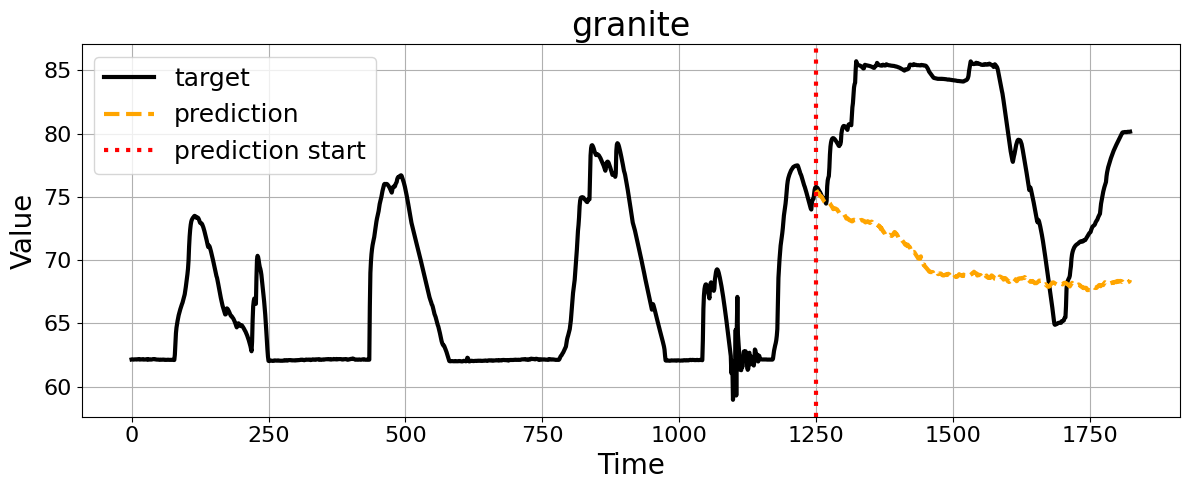

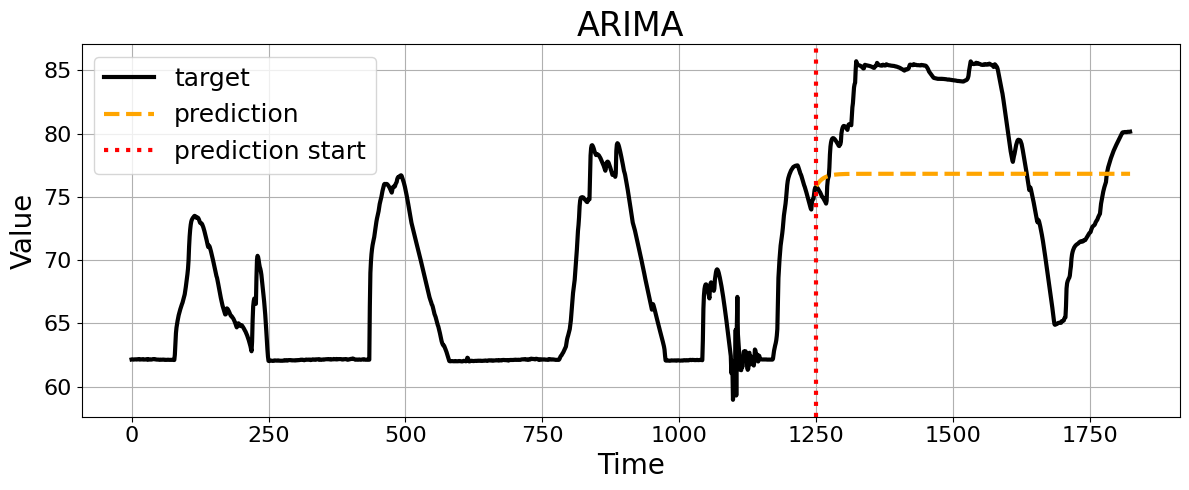

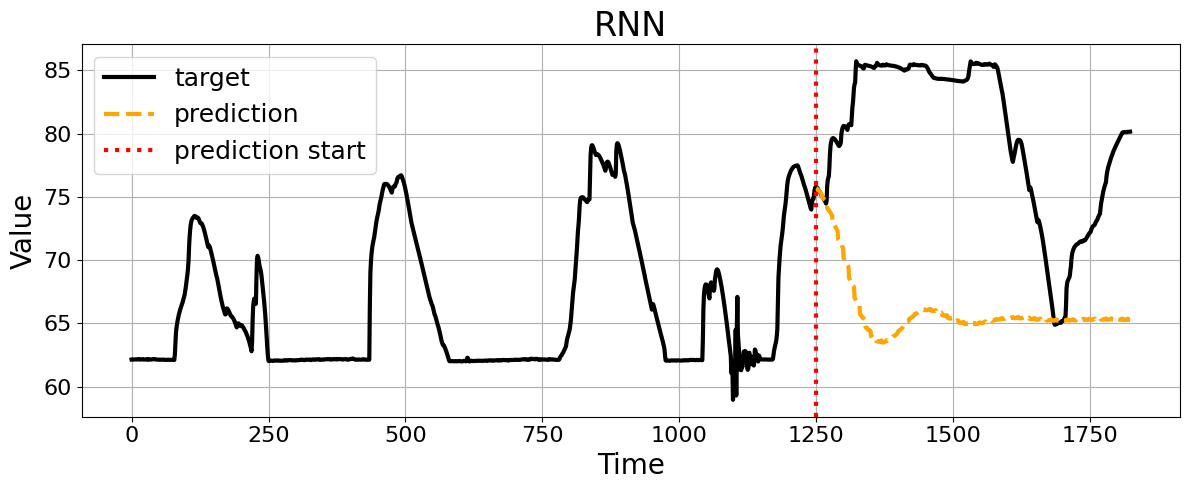

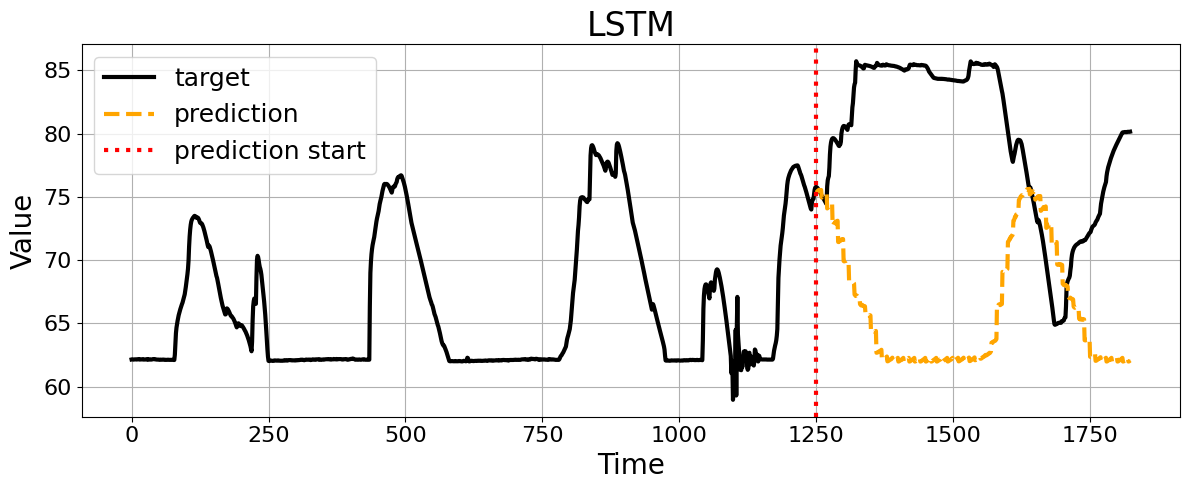

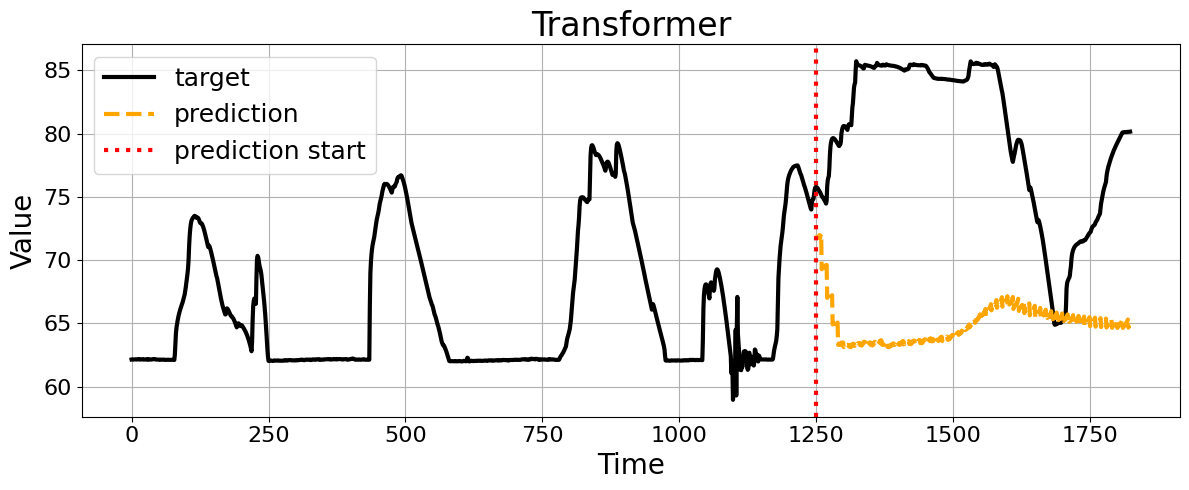

In [86]:
reload(plot_predictions)
plot_predictions.plot_target_vs_prediction("result/granite.csv", "granite")
plot_predictions.plot_target_vs_prediction("result/arima.csv", "ARIMA")
plot_predictions.plot_target_vs_prediction("result/rnn.csv", "RNN")
plot_predictions.plot_target_vs_prediction("result/lstm.csv", "LSTM")
plot_predictions.plot_target_vs_prediction("result/transformer.csv", "Transformer")


In [65]:
reload(evaluate_results)
evaluate_results.evaluate_predictions()


File,MSE,RMSE,MAE
arima.csv,45.94,6.78,6.05
granite.csv,130.29,11.41,10.15
lstm.csv,286.75,16.93,15.22
rnn.csv,206.03,14.35,13.1
transformer.csv,48.18,6.94,6.2

